# MANSI KALRA

# Task #1 : Prediction using Supervised ML

_**Objective :** Predicting the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables._

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split  

In [11]:
# Reading data from link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Visualisation

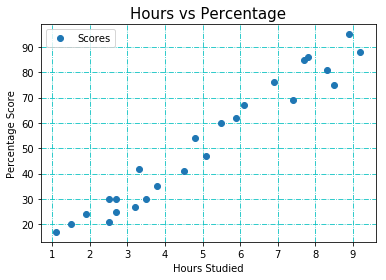

In [12]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', fontsize=15)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(b=True, color='c', linestyle='-.')
plt.show()

**The graph shows that the percentage of the student is directly proportional to the hours student studies.**

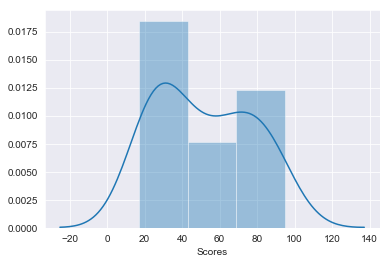

In [30]:
sns.set_style("darkgrid")
sns.distplot(df['Scores'])

In [15]:
#converting into labels(output) and attributes(input)
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 
print('Created labels and attributes successfully!')

Created labels and attributes successfully!


In [31]:
#spliting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

# Training Model

In [32]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training is complete.")

Training is complete.


# Line of Regression : y = ax + b

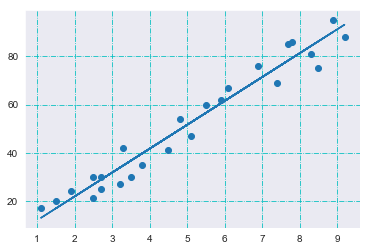

In [33]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.grid(b=True, color='c', linestyle='-.')
plt.show()

# Predictions

In [34]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
# Comparing Actual vs Predicted values
d = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
d 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


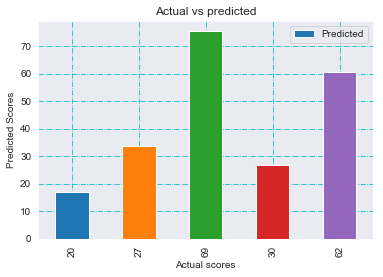

In [53]:
# Plotting the prediction with actual values
d.plot(x='Actual', y='Predicted',kind = 'bar')  
plt.title('Actual vs predicted')  
plt.xlabel('Actual scores')  
plt.ylabel('Predicted Scores')
plt.grid(color='c', linestyle='-.')
plt.show()

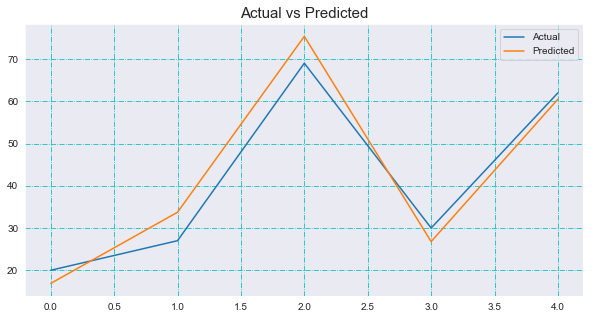

In [52]:
#comparing actual and predicted values
d1 = d.head()
d1.plot(figsize=(10,5))
plt.title('Actual vs Predicted', fontsize=15)
plt.grid(color='c', linestyle='-.')
plt.show()

In [36]:
#if the student studies for 9.25 hours, the marks obtained will be
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


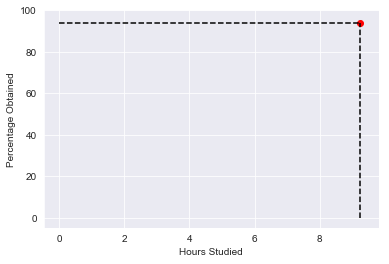

In [79]:
# plotting predicted percentage for given study hours
plt.vlines(hours, 0, own_pred, linestyle="dashed")
plt.hlines(own_pred, 0, hours, linestyle="dashed")
plt.scatter(hours,own_pred, color='r')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.show()

# Model Evaluation

In [59]:
#calculating the mean absolute error, mean squared error, and root mean squared error in predicted values and actual values.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
